In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE =32
CHANNELS = 3
EPOCHS = 50

In [ ]:
import os
import shutil

# Chemin du dossier d'origine contenant les images
source_folder = "/content/drive/MyDrive/dataset_chest_pneumonia/PNEUMONIA"

# Chemin du dossier de destination
destination_folder = "/content/drive/MyDrive/PNEUMONIA_data"

# Créer les dossiers pour chaque catégorie
bacterie_folder = os.path.join(destination_folder, "bacterie")
virus_folder = os.path.join(destination_folder, "virus")

# Créer les sous-dossiers s'ils n'existent pas
os.makedirs(bacterie_folder, exist_ok=True)
os.makedirs(virus_folder, exist_ok=True)

# Parcourir les fichiers du dossier source
for filename in os.listdir(source_folder):
    # Chemin complet du fichier
    file_path = os.path.join(source_folder, filename)

    # Vérifier s'il s'agit bien d'un fichier
    if os.path.isfile(file_path):
        # Classer les images en fonction de leur nom
        if "bacteria" in filename.lower():
            # Copier dans le dossier "bacterie"
            shutil.copy(file_path, os.path.join(bacterie_folder, filename))
        elif "virus" in filename.lower():
            # Copier dans le dossier "virus"
            shutil.copy(file_path, os.path.join(virus_folder, filename))

print("Les images ont été classées dans les sous-dossiers correspondants.")


Les images ont été classées dans les sous-dossiers correspondants.


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PNEUMONIA_data",
    #"/content/drive/MyDrive/chest_xray/dataset_chest_pneumonia_tuberculosis",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4273 files belonging to 2 classes.


In [ ]:
import os

# Chemins des sous-dossiers
bacterie_folder = "/content/drive/MyDrive/PNEUMONIA_data/bacterie"
virus_folder = "/content/drive/MyDrive/PNEUMONIA_data/virus"

# Fonction pour compter les fichiers dans un dossier
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Compter les images dans chaque sous-dossier
bacterie_count = count_images(bacterie_folder)
virus_count = count_images(virus_folder)

# Afficher le nombre d'images dans chaque dossier
print(f"Nombre d'images dans le dossier 'bacterie' : {bacterie_count}")
print(f"Nombre d'images dans le dossier 'virus' : {virus_count}")


Nombre d'images dans le dossier 'bacterie' : 2800
Nombre d'images dans le dossier 'virus' : 1493


In [ ]:
import os
import shutil
import random

source_dir = "/content/drive/MyDrive/PNEUMONIA_data"
target_dir = "/content/drive/MyDrive/PNEUMONIA_data_subset"

# Crée le dossier cible s'il n'existe pas
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Limite le nombre d'images par classe à 700
limit_per_class = 1400

for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    if os.path.isdir(class_dir):
        # Sélectionne aléatoirement 700 images
        images = os.listdir(class_dir)
        selected_images = random.sample(images, min(len(images), limit_per_class))

        # Crée le dossier de la classe cible
        target_class_dir = os.path.join(target_dir, class_name)
        os.makedirs(target_class_dir, exist_ok=True)

        # Copie les images sélectionnées
        for image_name in selected_images:
            source_path = os.path.join(class_dir, image_name)
            target_path = os.path.join(target_class_dir, image_name)
            shutil.copy(source_path, target_path)


In [ ]:
import os

# Chemins des sous-dossiers
bacterie_folder = "/content/drive/MyDrive/PNEUMONIA_data_subset/bacterie"
virus_folder = "/content/drive/MyDrive/PNEUMONIA_data_subset/virus"

# Fonction pour compter les fichiers dans un dossier
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Compter les images dans chaque sous-dossier
bacterie_count = count_images(bacterie_folder)
virus_count = count_images(virus_folder)

# Afficher le nombre d'images dans chaque dossier
print(f"Nombre d'images dans le dossier 'bacterie' : {bacterie_count}")
print(f"Nombre d'images dans le dossier 'virus' : {virus_count}")


Nombre d'images dans le dossier 'bacterie' : 1400
Nombre d'images dans le dossier 'virus' : 1400


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PNEUMONIA_data_subset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2800 files belonging to 2 classes.


In [ ]:
class_name = dataset.class_names
class_name

['bacterie', 'virus']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0]


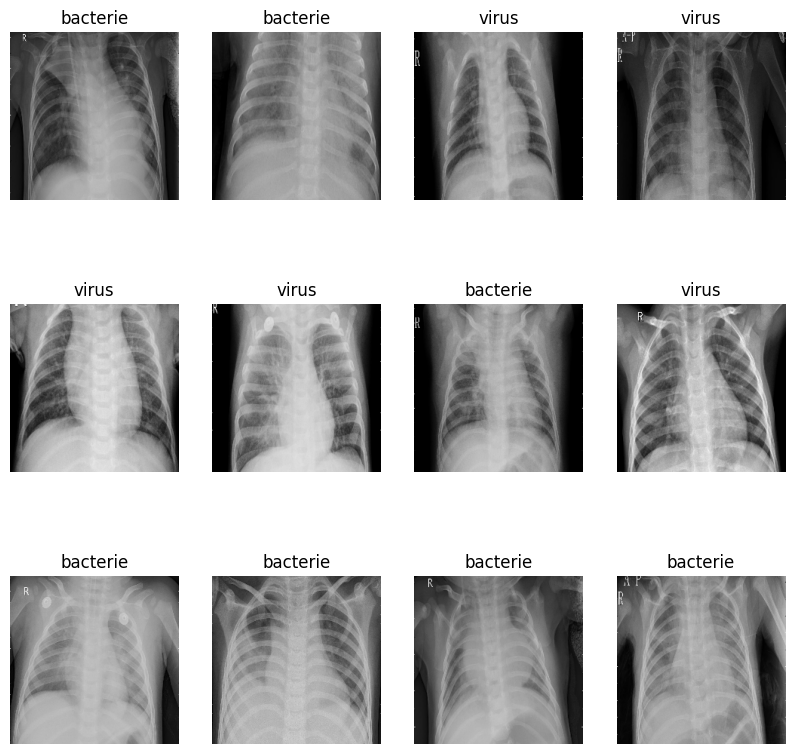

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        ax.imshow(image_batch[i].numpy().astype('uint8'))
        ax.set_title(class_name[label_batch[i].numpy()])
        ax.axis("off")
plt.show()


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

70

In [ ]:
len(val_ds)

8

In [ ]:
len(test_ds)

10

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    #layers.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 200,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 561s 362ms/step - accuracy: 0.5315 - loss: 1.1163 - val_accuracy: 0.6445 - val_loss: 0.6460
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6968 - loss: 0.5852 - val_accuracy: 0.7461 - val_loss: 0.5307
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7213 - loss: 0.5544 - val_accuracy: 0.7383 - val_loss: 0.5093
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7552 - loss: 0.5248 - val_accuracy: 0.7656 - val_loss: 0.5012
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7588 - loss: 0.5208 - val_accuracy: 0.7500 - val_loss: 0.5041
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7630 - loss: 0.5152 - val_accuracy: 0.7734 - val_loss: 0.4959
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7614 - loss: 0.5035 - val_accuracy: 0.8047 - val_loss: 0.4902
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7824 - loss: 0.4970 - val_accuracy:

In [ ]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9090 - loss: 1.0689


[0.9843831062316895, 0.9156249761581421]

In [ ]:
#model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8202 - loss: 0.3909


[0.3734946548938751, 0.828125]

In [ ]:
def predict_dataset(model, dataset, class_names):
    y_true = []
    y_pred = []

    # Parcourir le dataset pour faire des prédictions
    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        y_pred.extend(predicted_classes)
        y_true.extend(labels.numpy())  # Ajouter les étiquettes vraies

    return np.array(y_true), np.array(y_pred)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Prédire sur le dataset de test
y_true, y_pred = predict_dataset(model, test_ds, class_name)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_name)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
              precision    recall  f1-score   support

    bacterie       0.91      0.93      0.92       164
       virus       0.93      0.90      0.91       156

    accuracy                           0.92       320
   macro avg       0.92      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320



In [ ]:
model.save("/content/pneumonia_savedmodel_1400/chest_pneumonia_model_600.keras")

In [ ]:
model.export("/content/pneumonia_savedmodel_1400/chest_pneumonia_model_600")

Saved artifact at '/content/pneumonia_savedmodel_1400/chest_pneumonia_model_600'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  138327473848384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327473849440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138325501283664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327410323024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327410324784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327408978128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327408979536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327408981648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327408979184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327408976544: TensorSpec(shape=(),

In [ ]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


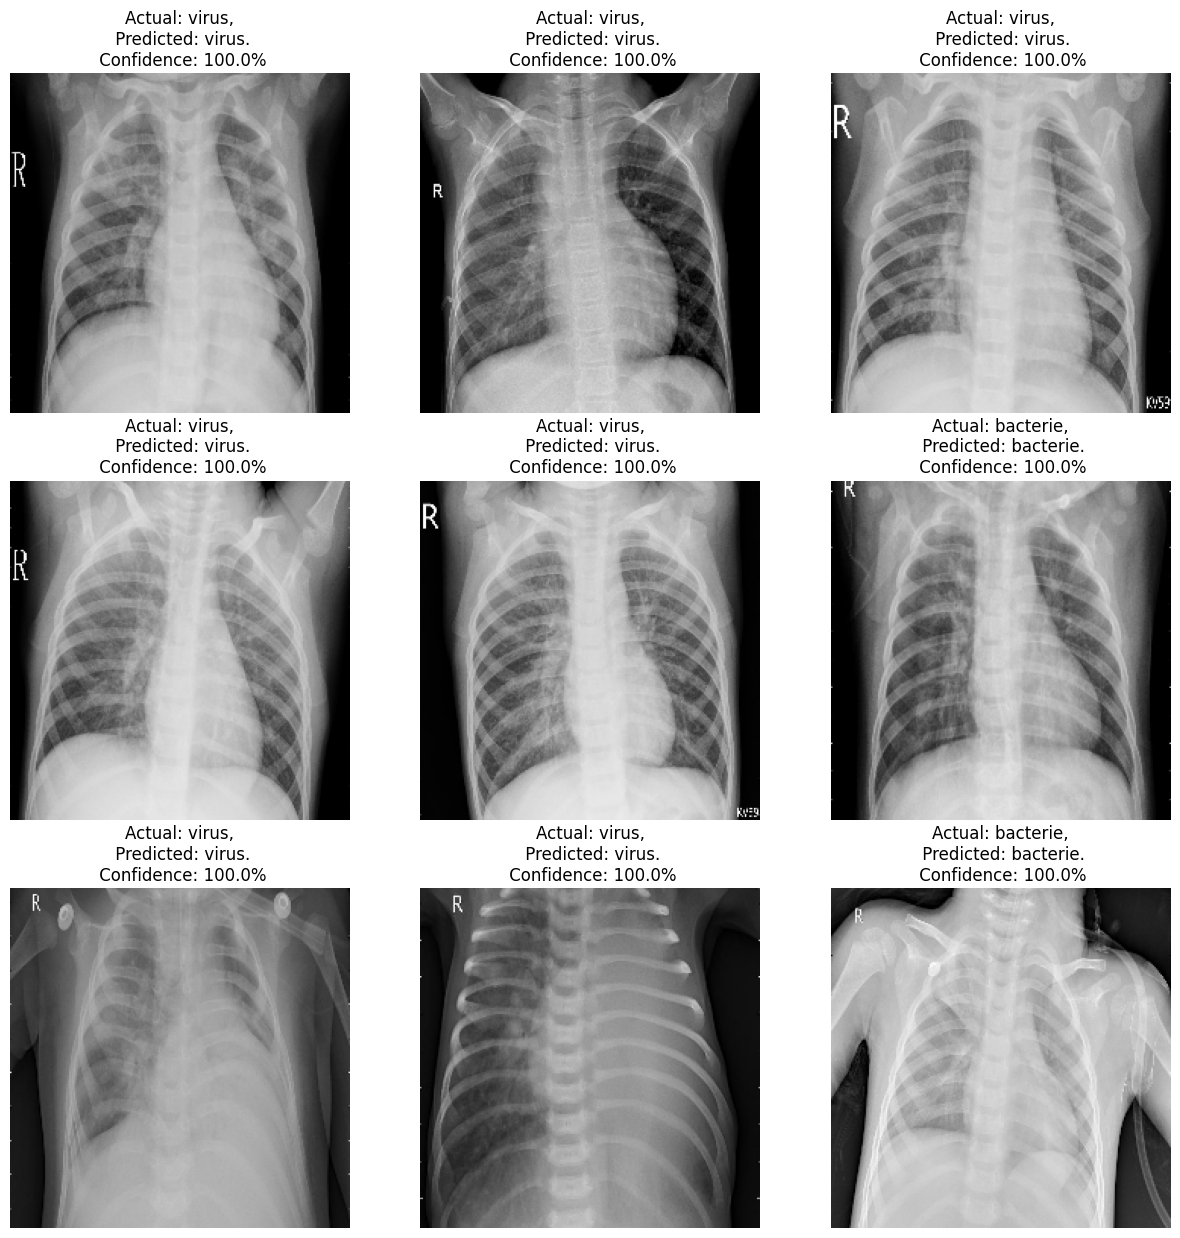

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 1
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs = 200,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.5619 - loss: 0.9740 - val_accuracy: 0.7148 - val_loss: 0.5594
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.7287 - loss: 0.5608 - val_accuracy: 0.7500 - val_loss: 0.5391
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7504 - loss: 0.5305 - val_accuracy: 0.7500 - val_loss: 0.5223
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7472 - loss: 0.5411 - val_accuracy: 0.7305 - val_loss: 0.5293
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.7597 - loss: 0.5146 - val_accuracy: 0.7695 - val_loss: 0.4906
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7481 - loss: 0.5126 - val_accuracy: 0.7617 - val_loss: 0.4954
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7821 - loss: 0.4920 - val_accuracy: 0.7812 - val_loss: 0.4889
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7861 - loss: 0.4756 - val_accuracy: 

In [ ]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9145 - loss: 1.7375


[1.3842206001281738, 0.921875]

In [ ]:
#model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8042 - loss: 0.3715


[0.3865184783935547, 0.8080357313156128]

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 1
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer = 'sgd',
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs = 200,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.4888 - loss: 0.7017 - val_accuracy: 0.4922 - val_loss: 0.6917
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5135 - loss: 0.6905 - val_accuracy: 0.6016 - val_loss: 0.6890
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.5546 - loss: 0.6877 - val_accuracy: 0.6211 - val_loss: 0.6824
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6056 - loss: 0.6800 - val_accuracy: 0.6758 - val_loss: 0.6707
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6075 - loss: 0.6640 - val_accuracy: 0.5469 - val_loss: 0.6602
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.6226 - loss: 0.6514 - val_accuracy: 0.6484 - val_loss: 0.6379
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.6481 - loss: 0.6351 - val_accuracy: 0.6602 - val_loss: 0.6434
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6356 - loss: 0.6397 - val_accuracy: 0

In [ ]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9450 - loss: 0.2292


[0.2776148021221161, 0.934374988079071]

In [ ]:
#model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9305 - loss: 0.3213


[0.27366048097610474, 0.940625011920929]

In [ ]:
def predict_dataset(model, dataset, class_names):
    y_true = []
    y_pred = []

    # Parcourir le dataset pour faire des prédictions
    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        y_pred.extend(predicted_classes)
        y_true.extend(labels.numpy())  # Ajouter les étiquettes vraies

    return np.array(y_true), np.array(y_pred)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Prédire sur le dataset de test
y_true, y_pred = predict_dataset(model, test_ds, class_name)

# Générer le rapport de classification
report = classification_report(y_true, y_pred, target_names=class_name)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

    bacterie       0.54      1.00      0.70       172
       virus       0.00      0.00      0.00       148

    accuracy                           0.54       320
   macro avg       0.27      0.50      0.35       320
weighted avg       0.29      0.54      0.38       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


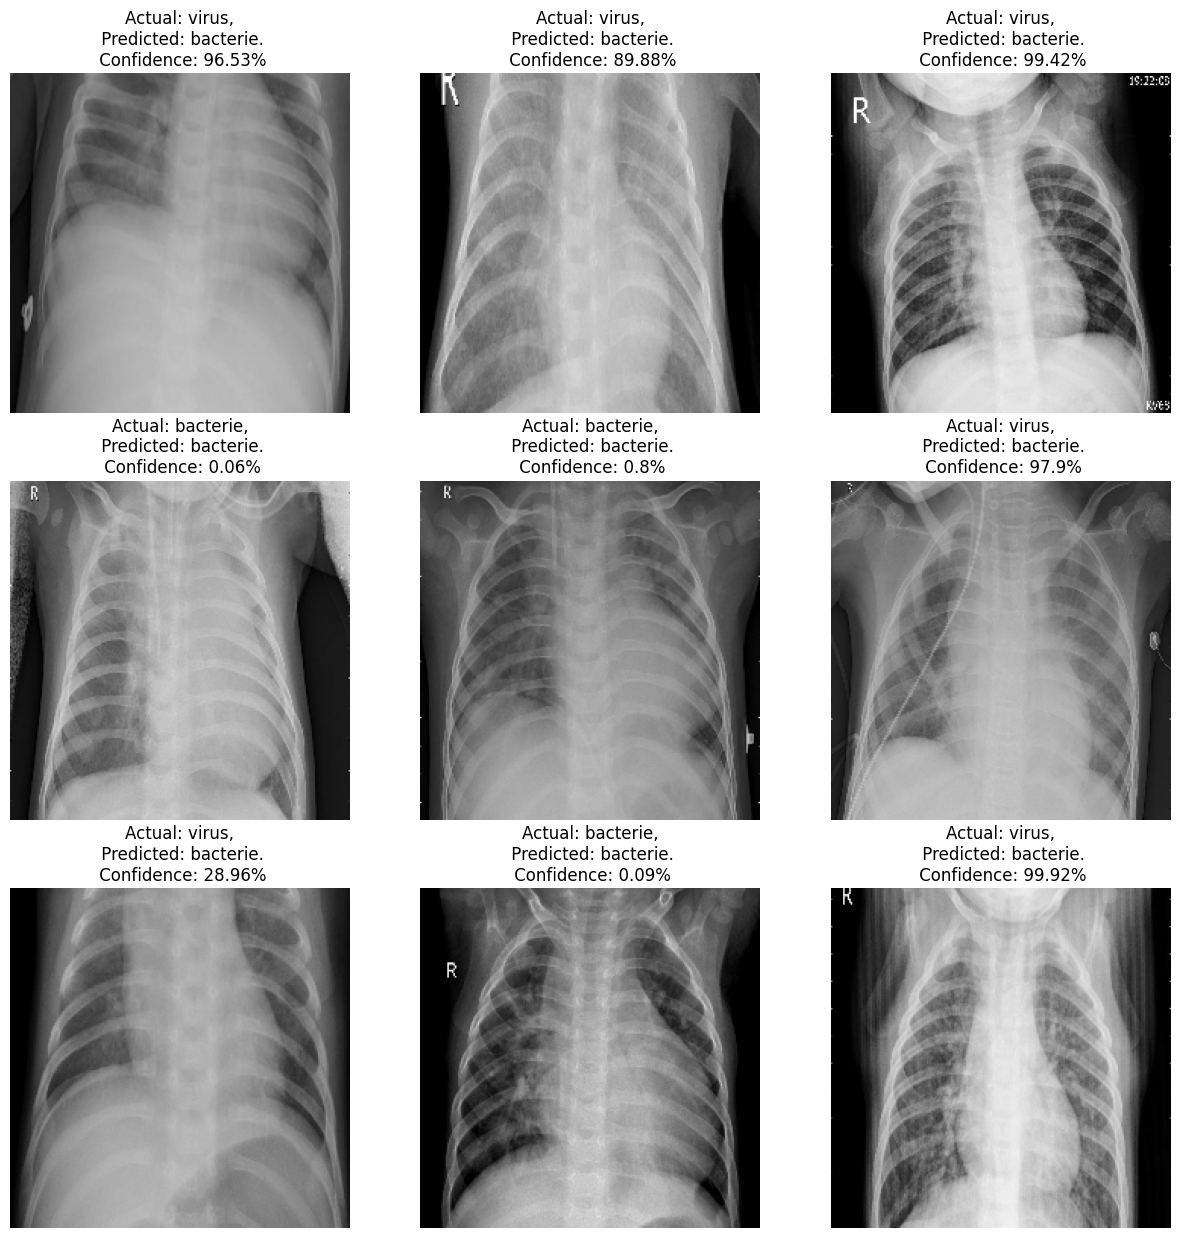

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    predicted_class, confidence = predict(model, images)
    actual_class = class_name[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


In [ ]:
model.save("/content/drive/MyDrive/model_pneumonia_type_sgd.keras")

In [ ]:
model.export("/content/drive/MyDrive/model_pneumonia_type_sgd")

Saved artifact at '/content/drive/MyDrive/model_pneumonia_type_sgd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_69')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136685449694192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136683152458144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136683150773408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136683150775696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136683150772880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136683150773760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136683150776048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136683150777984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136683150781328: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = 200,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - accuracy: 0.4780 - loss: 0.6966 - val_accuracy: 0.4922 - val_loss: 0.6878
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.6149 - loss: 0.6645 - val_accuracy: 0.6602 - val_loss: 0.6478
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6751 - loss: 0.6297 - val_accuracy: 0.6367 - val_loss: 0.6223
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6784 - loss: 0.6126 - val_accuracy: 0.6094 - val_loss: 0.6506
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6573 - loss: 0.6259 - val_accuracy: 0.6875 - val_loss: 0.5868
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6767 - loss: 0.6111 - val_accuracy: 0.6875 - val_loss: 0.5867
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6808 - loss: 0.6088 - val_accuracy: 0.7070 - val_loss: 0.5884
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.6831 - loss: 0.6004 - val_accuracy:

In [ ]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9043 - loss: 0.7015


[0.5880421996116638, 0.9281250238418579]

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model = tf.keras.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Spécifie la forme des données d'entrée
    resize_and_rescale,  # Redimensionnement et normalisation
    data_augmentation,   # Augmentation des données
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'sgd',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs = 300,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.4719 - loss: 0.6939 - val_accuracy: 0.4727 - val_loss: 0.6932
Epoch 2/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.4922 - val_loss: 0.6934
Epoch 3/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.4922 - val_loss: 0.6932
Epoch 4/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4865 - loss: 0.6933 - val_accuracy: 0.4922 - val_loss: 0.6930
Epoch 5/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5058 - loss: 0.6929 - val_accuracy: 0.4922 - val_loss: 0.6930
Epoch 6/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.4994 - loss: 0.6929 - val_accuracy: 0.4922 - val_loss: 0.6928
Epoch 7/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5038 - loss: 0.6926 - val_accuracy: 0.4922 - val_loss: 0.6928
Epoch 8/300
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.4911 - loss: 0.6928 - val_accuracy: 

In [ ]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8741 - loss: 0.4107


[0.41544970870018005, 0.8968750238418579]

### Transfer learning

In [ ]:
#!pip install tensorflow==2.13.0
#!pip install --upgrade tensorflow-hub

import numpy as np
import cv2

import PIL
import PIL.Image as Image
import os
import datetime
import time


%load_ext tensorboard
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PNEUMONIA_data_subset",
    shuffle = True,
    image_size = (224, 224),
    batch_size = 32
)

Found 2800 files belonging to 2 classes.


In [ ]:
class_name = dataset.class_names
class_name

['bacterie', 'virus']

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    #layers.RandomRotation(0.2),
])

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor_model = mobilenet_v2


In [ ]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Assuming you have 'data_augmentation' and 'feature_extractor_layer' defined

num_classes = len(class_name)

# Wrap the feature_extractor_layer in a tf.keras.layers.Layer using the Lambda layer
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),  # Wrap with Lambda layer
  tf.keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

log_dir = "/content/logs2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.


In [ ]:
NUM_EPOCHS = 200

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=tensorboard_callback)

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - acc: 0.5318 - loss: 0.8359 - val_acc: 0.7188 - val_loss: 0.5715
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - acc: 0.6820 - loss: 0.5975 - val_acc: 0.6523 - val_loss: 0.5896
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - acc: 0.7181 - loss: 0.5709 - val_acc: 0.7305 - val_loss: 0.5370
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - acc: 0.7262 - loss: 0.5676 - val_acc: 0.7734 - val_loss: 0.5174
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - acc: 0.7180 - loss: 0.5724 - val_acc: 0.7031 - val_loss: 0.5698
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.7385 - loss: 0.5589 - val_acc: 0.7500 - val_loss: 0.5263
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.7451 - loss: 0.5449 - val_acc: 0.7617 - val_loss: 0.5199
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - acc: 0.7474 - loss: 0.5251 - val_acc: 0.7422 - val_loss: 0.5334
Epoch 9/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - ac

In [ ]:
model.evaluate(test_ds)

In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_name[predicted_id]
print(predicted_label_batch)


In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Définissez vos paramètres
num_classes = 2  # Ajustez selon le nombre de classes dans votre projet
input_shape = (224, 224, 3)  # Taille d'entrée des images (224x224 dans cet exemple)
batch_size = 32
epochs = 50

# Chargement du modèle DenseNet-121 avec des poids ImageNet
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Geler les couches du modèle de base pour l'entraînement initial
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Ajouter des couches personnalisées pour la classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Créer le modèle final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilation du modèle
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
# Entraînement du modèle
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


70/70 ━━━━━━━━━━━━━━━━━━━━ 108s 678ms/step - accuracy: 0.6187 - loss: 0.9857 - val_accuracy: 0.7461 - val_loss: 0.5205
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.7258 - loss: 0.5360 - val_accuracy: 0.7461 - val_loss: 0.5133
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.7464 - loss: 0.5131 - val_accuracy: 0.7461 - val_loss: 0.5264
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7608 - loss: 0.5165 - val_accuracy: 0.7891 - val_loss: 0.4440
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.7689 - loss: 0.4844 - val_accuracy: 0.7852 - val_loss: 0.4897
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7693 - loss: 0.4845 - val_accuracy: 0.8242 - val_loss: 0.4257
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7808 - loss: 0.4776 - val_accuracy: 0.8320 - val_loss: 0.4285
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.8091 - loss: 0.4290 - val_accuracy: 0.8203 - val_loss

In [ ]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9743 - loss: 0.1271


[0.13639961183071136, 0.96875]

In [ ]:
model.save("/content/chest_pneumonia_type_model_finetuned.keras")

In [ ]:
model.export("/content/chest_pneumonia_type_model_finetuned")

Saved artifact at '/content/chest_pneumonia_type_model_finetuned'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  136851420981280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851420974240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851420984624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851420979168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851420979344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851421350192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851421357232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851421354944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851421355648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136851421360752: TensorSpec(shape=(), dtype=tf.resource